In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
data = load_breast_cancer()
X, y = data.data, data.target

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [5]:
svm_linear = SVC(kernel="linear", C=1)
svm_linear.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [7]:
svm_rbf = SVC(kernel="rbf", C=1, gamma=0.1)
svm_rbf.fit(X_train, y_train)

SVC(C=1, gamma=0.1)

In [8]:
y_pred_linear = svm_linear.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)

In [9]:
print("Linear SVM Accuracy:", accuracy_score(y_test, y_pred_linear))
print("RBF SVM Accuracy:", accuracy_score(y_test, y_pred_rbf))

print("\nConfusion Matrix (RBF):\n", confusion_matrix(y_test, y_pred_rbf))
print("\nClassification Report (RBF):\n", classification_report(y_test, y_pred_rbf))

Linear SVM Accuracy: 0.956140350877193
RBF SVM Accuracy: 0.9649122807017544

Confusion Matrix (RBF):
 [[41  2]
 [ 2 69]]

Classification Report (RBF):
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        43
           1       0.97      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



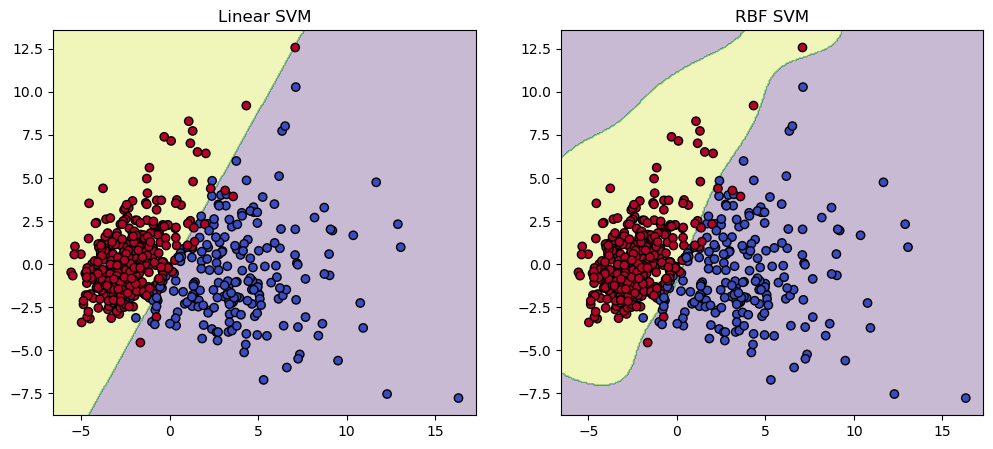

In [10]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 5))
for i, (model, title) in enumerate(zip([svm_linear, svm_rbf], ["Linear SVM", "RBF SVM"])):
    model_2d = SVC(kernel=model.kernel, C=model.C, gamma=model.gamma if model.kernel=="rbf" else 'scale')
    model_2d.fit(X_pca, y)

    x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
    y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
    
    Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.subplot(1, 2, i+1)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title(title)
plt.show()

param_grid = {
    "C": [0.1, 1, 10, 100],
    "gamma": [1, 0.1, 0.01, 0.001],
    "kernel": ["rbf"]
}

In [11]:
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=0, cv=5)
grid.fit(X_train, y_train)

print("\nBest Parameters from Grid Search:", grid.best_params_)
y_pred_best = grid.predict(X_test)
print("Best Model Accuracy:", accuracy_score(y_test, y_pred_best))


Best Parameters from Grid Search: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best Model Accuracy: 0.9824561403508771
